# Solution to problem set 4 exercise 3

a) Implement a function which takes as input m ∈ N and outputs m i.i.d. sample points (x1,y1), ...,(xm,ym) ∼ ρ

In [79]:
# import necessary packages

import numpy as np  
import matplotlib.pyplot as plt

In [132]:
def generate_data(m):
    x = np.random.uniform(-1, 1, m)
    y = x**2+np.sin(2*np.pi*x) + np.random.normal(0, 0.1, m)
    return x,y


b) Implement functions corresponding to the kernel functions (i.e., the functions take as input x,x′ ∈ R and output k(x,x′) ∈ R) 
1. k(x,x′)=⟨x,x′⟩+1
2. k(x, x′) = exp(−γ∥x − x′∥2) for some γ > 0 (where γ is a hyper parameter; for part c), you
can for instance use γ ≈ 5)
3. a third kernel function of your choice

In [127]:
def k1(x1,x2):
    return x1*x2+1

def k2(x1,x2,g=5):
    return np.exp(-g*(x1-x2)**2)

def k3(x1,x2,g=3):
    return np.exp(-g*np.abs(x1-x2))

c) Implement a function which takes as input sample points (x1, y1), . . . , (xm, ym) ∈ R × R, a regularization parameter λ > 0 and the kernel function, which outputs the optimal parameters to the regularized least-square kernel regression problem given by Corollary 5.8 from the lecture. I.e., it should return a ∈ Rm such that
(λmIm +Km)a=b ⇔ a=(λmIm +Km)−1b,
whereIm ∈Rm×m istheidentitymatrix,Km ∈Rm×Rm isgivenbyKm[i,j]=K(xi,xj),and
b = (y1,...,ym).

In [120]:
def create_kernel_matrix(x,k):
    m = len(x)
    K = np.zeros((m,m))
    for i in range(m):
        K[i,:] = k(x[i],x)
    return K

def solve_optm_lskr(x,y,k,l):
    m = len(x)
    I = np.identity(m)
    K = create_kernel_matrix(x,k)
    return np.linalg.inv(l*m*I+K)@y

d) Implement a function which takes as input (x1, . . . , xm) ∈ Rm, a ∈ Rm, a kernel function k and
x ∈ R and outputs Pmi=1 aik(xi, x).

In [121]:
def predict(x,y,k,xl,l):
    a = solve_optm_lskr(x,y,k,l)
    pred = []
    for xr in xl:
        pred.append(a @ k(x,xr))
    return pred

e) Generate iid samples (xi, yi) ∼ ρ, i = 1, . . . , m, and visualize the optimal least squares regularized kernel regression function obtained using c) and d) for different kernels, number of sample points, and different regularization parameters. E.g., use m = 10, 200 and λ = 5, 0.25, 0.0001.

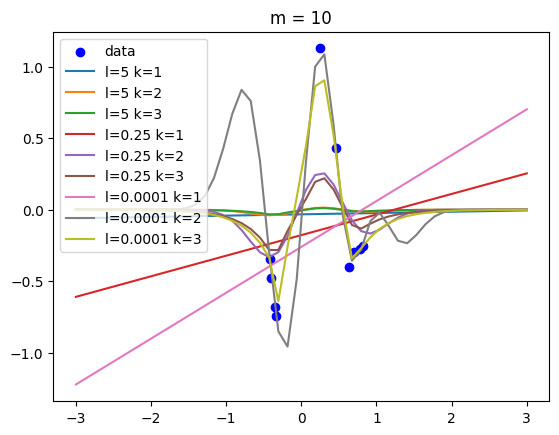

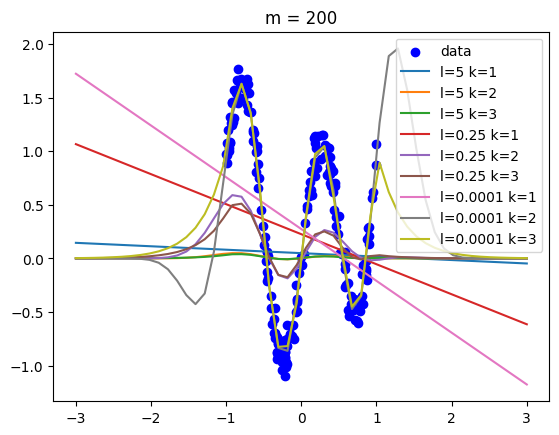

In [135]:
m_list = [10,200]
l_list = [5,0.25,0.0001]
k_list = [k1,k2,k3]

x_axis = np.linspace(-3,3)
for m in m_list:
    x,y = generate_data(m)
    preds = {}
    for l in l_list:
        i = 1
        for k in k_list:
            preds["l=" + str(l)+" k=" +str(i)] = predict(x,y,k,x_axis,l)
            i+=1
    # plot
    plt.scatter(x, y, color='b',label = 'data')
    for key, values_array in preds.items():
        plt.plot(x_axis,values_array, label=key)
    plt.title('m = '+str(m))
    plt.legend()
    plt.show()
